[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://drive.google.com/file/d/1XKGtzQjVuIcKwvsWaRVn3D0zAYyeJToy/view?usp=sharing)

# Módulo Programando Diversidades - Sesión 6

**Pandas avanzado**

*Valentina Roquemen*

> En esta sesión se dará continuidad a las aplicaciones que tiene la librería: **Pandas**. Así como se hizo en la [*sesión 5*](https://github.com/colectivafemcen/Programando-Diversidades/blob/main/Python/ProgramandoDiversidades_sesion5.ipynb) se explicarán el alcance de Pandas para graficar, cambiar el formato de impresión, manipular cadenas de caracteres, entre otros. Para este ejercicio se usará una base de datos que contiene información de videos *trending* en Youtube en diferentes países.

In [ ]:
#--- importamos las librerías ---#
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd

%matplotlib inline

## Base de datos

Para esta sesión utilizaremos una base de datos de videos *trending* en Youtube en diferentes países. Pueden descargar la base de datos directamente desde Kaggle [aquí](https://www.kaggle.com/datasnaek/youtube-new?select=MXvideos.csv). En el archivo comprimido que se encuentra en el repositorio guardamos únicamente unas partes de las bases de datos de México, Estados Unidos y Rusia, que son las que usaremos en este notebook.

In [ ]:
!wget https://github.com/colectivafemcen/Programando-Diversidades/raw/main/Python/Trending.zip

--2021-10-06 00:15:36--  https://github.com/colectivafemcen/Programando-Diversidades/raw/main/Python/Trending.zip
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/colectivafemcen/Programando-Diversidades/main/Python/Trending.zip [following]
--2021-10-06 00:15:36--  https://raw.githubusercontent.com/colectivafemcen/Programando-Diversidades/main/Python/Trending.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12016393 (11M) [application/zip]
Saving to: ‘Trending.zip’

Trending.zip        100%[===================>]  11.46M  --.-KB/s    in 0.09s   

2021-10-06 00:15:36 (134 MB/s) - ‘Trending.zip’ 

In [ ]:
!unzip Trending.zip

Archive:  Trending.zip
  inflating: MXVideos.csv            
  inflating: RUVideos.csv            
  inflating: USVideos.csv            


In [ ]:
MXVideos = pd.read_csv('MXVideos.csv', sep=';') #encoding='latin1'
RUVideos = pd.read_csv('RUVideos.csv', sep=';')
USVideos = pd.read_csv('USVideos.csv', sep=';')

En primer lugar, estudiamos la información dentro de la base de datos con algunas funciones que vimos en la sesión anterior.

In [ ]:
MXVideos.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,Grq_h8S_UlE,2018-03-01,Zoé - Azul,ZoeVEVO,10,2018-03-01T06:00:01.000Z,"Zoé|""Azul""|""EMI""|""Mexico""|""Latin""|""Rock""",102179,20901,172,3188,https://i.ytimg.com/vi/Grq_h8S_UlE/default.jpg,False,False,False,Music video by Zoé performing Azul. (C) 2018 U...
1,2XIWmQFdr0s,2018-03-01,Datos reales de cuánto dinero se gana en Youtu...,LA LATA,1,2018-03-01T00:08:02.000Z,"la|""lata""|""combo""|""lalata""|""estoescombo""|""alex...",400418,36333,965,2917,https://i.ytimg.com/vi/2XIWmQFdr0s/default.jpg,False,False,False,Cada miércoles les traigo una anécdota nueva y...
2,WtW5MqTBedw,2018-03-01,EL CHALLENGE MAS IDIOTA !,JuegaGerman,24,2018-03-01T00:00:03.000Z,"juegagerman|""juega""|""german""|""comedia""|""funny""...",1093946,137101,1854,18864,https://i.ytimg.com/vi/WtW5MqTBedw/default.jpg,False,False,False,Por favor SUSCRIBETE AHORA! http://bit.ly/JGsu...
3,PRjdKZKPBIg,2018-03-01,😡 URGENTE ! ALEX BACKMAN: 🚫 ¡NO SOY YO! EN WHA...,concienciaradio,25,2018-02-28T23:49:19.000Z,"alexander backman|""conciencia radio""|""alexande...",322879,17351,918,2896,https://i.ytimg.com/vi/PRjdKZKPBIg/default.jpg,False,False,False,(CR NOTICIAS FEB 28 2018) Conciencia Radio Net...
4,dqm9vpZmCxA,2018-03-01,Bullying Infantil *Experimento Social,SKabeche,24,2018-03-01T00:48:45.000Z,"bullying|""infantil""|""experimento social""|""acos...",203789,25572,614,2834,https://i.ytimg.com/vi/dqm9vpZmCxA/default.jpg,False,False,False,VIDEO ANTERIOR\n\n► ¡https://www.youtube.com/w...


In [ ]:
MXVideos.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')

In [ ]:
MXVideos.describe()

,category_id,views,likes,dislikes,comment_count
count,19512.000000,1.951200e+04,1.951200e+04,19512.000000,19512.000000
mean,21.011993,3.568644e+05,1.567812e+04,660.632995,1915.026189
std,5.909510,1.600945e+06,8.522812e+04,3657.439648,13240.672660
min,1.000000,2.550000e+02,0.000000e+00,0.000000,0.000000
25%,20.000000,2.105525e+04,3.587500e+02,21.000000,50.000000
50%,24.000000,6.643550e+04,1.435000e+03,72.000000,215.000000
75%,24.000000,2.234542e+05,7.337250e+03,280.000000,909.000000
max,29.000000,6.279639e+07,4.470923e+06,127684.000000,905925.000000


In [ ]:
MXVideos.dtypes

video_id                  object
trending_date             object
title                     object
channel_title             object
category_id                int64
publish_time              object
tags                      object
views                      int64
likes                      int64
dislikes                   int64
comment_count              int64
thumbnail_link            object
comments_disabled           bool
ratings_disabled            bool
video_error_or_removed      bool
description               object
dtype: object

## Manipulación de fechas

Pandas tiene un formato especial para fechas llamado `datetime` que facilita su manipulación y extracción. El formato no suele cargarse de forma automática y por eso es necesario especificarlo al momento de la lectura del archivo o cambiarlo manualmente después.

Para hacerlo al momento de la lectura, podemos usar el parámetro `parse_dates` y definir un `date_parser`, que es una función que indica cuál es el formato que tienen las fechas.

In [ ]:
def date_par(column):
    return pd.to_datetime(column, format='%Y-%m-%d')

MXVideos_act = pd.read_csv('MXVideos.csv',
                           sep=';',
                           parse_dates=['trending_date'],
                           date_parser=date_par)

In [ ]:
MXVideos_act['trending_date'].head()

0   2018-03-01
1   2018-03-01
2   2018-03-01
3   2018-03-01
4   2018-03-01
Name: trending_date, dtype: datetime64[ns]

También podemos usar la función `to_datetime` directamente.

In [ ]:
MXVideos['trending_date'].head()

0    2018-03-01
1    2018-03-01
2    2018-03-01
3    2018-03-01
4    2018-03-01
Name: trending_date, dtype: object

In [ ]:
MXVideos['trending_date'] = pd.to_datetime(MXVideos['trending_date'], format='%Y-%m-%d')

In [ ]:
MXVideos['trending_date']

0       2018-03-01
1       2018-03-01
2       2018-03-01
3       2018-03-01
4       2018-03-01
           ...    
19507   2018-06-14
19508   2018-06-14
19509   2018-06-14
19510   2018-06-14
19511   2018-06-14
Name: trending_date, Length: 19512, dtype: datetime64[ns]

Como la columna se encuentra en formato `datetime`, ahora podemos extraer el año, el mes y el día de dos formas:

In [ ]:
MXVideos['Month'] = pd.DatetimeIndex(MXVideos['trending_date']).month

In [ ]:
MXVideos['Month']

0        3
1        3
2        3
3        3
4        3
        ..
19507    6
19508    6
19509    6
19510    6
19511    6
Name: Month, Length: 19512, dtype: int64

O también:

In [ ]:
MXVideos['trending_date'].dt.month

0        3
1        3
2        3
3        3
4        3
        ..
19507    6
19508    6
19509    6
19510    6
19511    6
Name: trending_date, Length: 19512, dtype: int64

Para extraer el mes y el año:

In [ ]:
MXVideos['Year_Month'] = MXVideos['trending_date'].dt.strftime('%Y-%m')

In [ ]:
MXVideos['Year_Month'] 

0        2018-03
1        2018-03
2        2018-03
3        2018-03
4        2018-03
          ...   
19507    2018-06
19508    2018-06
19509    2018-06
19510    2018-06
19511    2018-06
Name: Year_Month, Length: 19512, dtype: object

Recordamos que los NaN que se encuentren en columnas tipo `datetime` serán convertidos a NaT.

## Unión de dataframes

Pandas permite unir data frames de muchas formas diferentes dependiendo del tipo de unión que necesitemos realizar. Para mostrar más claramente el resultados de las operaciones, cremos unos data frames extra.

In [ ]:
MXdf = MXVideos[['trending_date', 'views', 'likes']][:5]
MXdf2 = MXVideos[['title', 'views', 'dislikes']][3:8]
MXdf3 = MXVideos[['title', 'tags', 'dislikes']][3:8]

USdf = USVideos[['title', 'likes', 'dislikes']][3:8]

RUdf = RUVideos[['title', 'likes', 'dislikes']][:5]

### Append

La función `append` permite agregar una serie o data frame al final de otra si contienen las mismas columnas.

In [ ]:
USdf.append(RUdf)

,title,likes,dislikes
3,Clean Bandit - Solo feat. Demi Lovato [Officia...,101802,1373
4,HIGH SCHOOL IN 2008 VS 2018,63516,5174
5,"Cardi B, Bad Bunny & J Balvin - I Like It [Off...",1099213,53271
6,"Pokémon: Let's Go, Pikachu! and Pokémon: Let's...",197681,21223
7,Blind Girl Describes My Face to a Police Sketc...,172339,1733
0,[BadComedian] - Движение Вверх (Плагиат или ве...,369380,9070
1,ЧТО такое КЕБАБСТЕР? Шаверма или ШАУРМА?,27585,2497
2,Gorillaz - Humility (Official Video),337536,5789
3,Ошуительное Хоу - Александр Шпак,25725,11271
4,GAZLIVE | Тина Канделаки,10212,1635


Podemos agregar la opción `ignore_index=True` para reorganizar el índice.

In [ ]:
USdf.append(RUdf, ignore_index=True)

,title,likes,dislikes
0,Clean Bandit - Solo feat. Demi Lovato [Officia...,101802,1373
1,HIGH SCHOOL IN 2008 VS 2018,63516,5174
2,"Cardi B, Bad Bunny & J Balvin - I Like It [Off...",1099213,53271
3,"Pokémon: Let's Go, Pikachu! and Pokémon: Let's...",197681,21223
4,Blind Girl Describes My Face to a Police Sketc...,172339,1733
5,[BadComedian] - Движение Вверх (Плагиат или ве...,369380,9070
6,ЧТО такое КЕБАБСТЕР? Шаверма или ШАУРМА?,27585,2497
7,Gorillaz - Humility (Official Video),337536,5789
8,Ошуительное Хоу - Александр Шпак,25725,11271
9,GAZLIVE | Тина Канделаки,10212,1635


En caso de que tengan columnas diferentes, se agregan todas las columnas al data frame y se asigna un NaN a las celdas con información desconocida.

In [ ]:
MXdf.append(USdf)

,trending_date,views,likes,title,dislikes
0,2018-03-01,102179.0,20901,NaN,NaN
1,2018-03-01,400418.0,36333,NaN,NaN
2,2018-03-01,1093946.0,137101,NaN,NaN
3,2018-03-01,322879.0,17351,NaN,NaN
4,2018-03-01,203789.0,25572,NaN,NaN
3,NaT,NaN,101802,Clean Bandit - Solo feat. Demi Lovato [Officia...,1373.0
4,NaT,NaN,63516,HIGH SCHOOL IN 2008 VS 2018,5174.0
5,NaT,NaN,1099213,"Cardi B, Bad Bunny & J Balvin - I Like It [Off...",53271.0
6,NaT,NaN,197681,"Pokémon: Let's Go, Pikachu! and Pokémon: Let's...",21223.0
7,NaT,NaN,172339,Blind Girl Describes My Face to a Police Sketc...,1733.0


### Concat

Podemos obtener resultados similares con la función `concat` si concatenamos en el eje `0` (filas), como es por defecto.

In [ ]:
Videos = pd.concat([USdf, RUdf])

In [ ]:
Videos

,title,likes,dislikes
3,Clean Bandit - Solo feat. Demi Lovato [Officia...,101802,1373
4,HIGH SCHOOL IN 2008 VS 2018,63516,5174
5,"Cardi B, Bad Bunny & J Balvin - I Like It [Off...",1099213,53271
6,"Pokémon: Let's Go, Pikachu! and Pokémon: Let's...",197681,21223
7,Blind Girl Describes My Face to a Police Sketc...,172339,1733
0,[BadComedian] - Движение Вверх (Плагиат или ве...,369380,9070
1,ЧТО такое КЕБАБСТЕР? Шаверма или ШАУРМА?,27585,2497
2,Gorillaz - Humility (Official Video),337536,5789
3,Ошуительное Хоу - Александр Шпак,25725,11271
4,GAZLIVE | Тина Канделаки,10212,1635


Si concatemos en el eje `1` (columnas), existen dos opciones que se ejecutarán según el parámetro `join`. La opción por defecto es `join = outer`, que conserva toda la información de los data frames y alineará filas con el mismo índice.

In [ ]:
MXdf

,trending_date,views,likes
0,2018-03-01,102179,20901
1,2018-03-01,400418,36333
2,2018-03-01,1093946,137101
3,2018-03-01,322879,17351
4,2018-03-01,203789,25572


In [ ]:
USdf

,title,likes,dislikes
3,Clean Bandit - Solo feat. Demi Lovato [Officia...,101802,1373
4,HIGH SCHOOL IN 2008 VS 2018,63516,5174
5,"Cardi B, Bad Bunny & J Balvin - I Like It [Off...",1099213,53271
6,"Pokémon: Let's Go, Pikachu! and Pokémon: Let's...",197681,21223
7,Blind Girl Describes My Face to a Police Sketc...,172339,1733


In [ ]:
pd.concat([MXdf, USdf], axis=1)

,trending_date,views,likes,title,likes,dislikes
0,2018-03-01,102179.0,20901.0,NaN,NaN,NaN
1,2018-03-01,400418.0,36333.0,NaN,NaN,NaN
2,2018-03-01,1093946.0,137101.0,NaN,NaN,NaN
3,2018-03-01,322879.0,17351.0,Clean Bandit - Solo feat. Demi Lovato [Officia...,101802.0,1373.0
4,2018-03-01,203789.0,25572.0,HIGH SCHOOL IN 2008 VS 2018,63516.0,5174.0
5,NaT,NaN,NaN,"Cardi B, Bad Bunny & J Balvin - I Like It [Off...",1099213.0,53271.0
6,NaT,NaN,NaN,"Pokémon: Let's Go, Pikachu! and Pokémon: Let's...",197681.0,21223.0
7,NaT,NaN,NaN,Blind Girl Describes My Face to a Police Sketc...,172339.0,1733.0


La opción `join=inner` conserva únicamente las filas con el mismo índice, es decir, elimina las filas donde hay información desconocida.

In [ ]:
pd.concat([MXdf, USdf], axis=1, join='inner')

,trending_date,views,likes,title,likes,dislikes
3,2018-03-01,322879,17351,Clean Bandit - Solo feat. Demi Lovato [Officia...,101802,1373
4,2018-03-01,203789,25572,HIGH SCHOOL IN 2008 VS 2018,63516,5174


### Merge

La función `merge` es útil para unir data frames que tienen una o varias columnas en común. La unión se hace por columnas en base a la columna que comparten. Además, el data frame que se usa como primer argumento siempre va a la izquierda y el que se se usa como segundo argumento siempre va a la derecha (menos la columna que tienen en común).

Como con la función anterior, tenemos varios casos según lo que especifique el parámetro `how`.

In [ ]:
MXdf

,trending_date,views,likes
0,2018-03-01,102179,20901
1,2018-03-01,400418,36333
2,2018-03-01,1093946,137101
3,2018-03-01,322879,17351
4,2018-03-01,203789,25572


In [ ]:
MXdf2

,title,views,dislikes
3,😡 URGENTE ! ALEX BACKMAN: 🚫 ¡NO SOY YO! EN WHA...,322879,918
4,Bullying Infantil *Experimento Social,203789,614
5,50 cosas sobre el Jefote I Papá de Fedelobo I,191072,149
6,Chivas vs Cibao 5-0 Resumen Goles Concahampion...,213890,107
7,Iggy Azalea - Savior ft. Quavo,286104,1627


Por defecto, se tiene `how=inner`. Esto elimina todas las filas que no contienen entradas iguales en la columna sobre la que se va a hacer la unión.

In [ ]:
pd.merge(MXdf, MXdf2, on='views')

,trending_date,views,likes,title,dislikes
0,2018-03-01,322879,17351,😡 URGENTE ! ALEX BACKMAN: 🚫 ¡NO SOY YO! EN WHA...,918
1,2018-03-01,203789,25572,Bullying Infantil *Experimento Social,614


En el caso `how=outer` se conserva toda la información de ambos data frames y se llenan las celdas desconocidas con NaN. 

In [ ]:
pd.merge(MXdf, MXdf2, on='views', how='outer')

,trending_date,views,likes,title,dislikes
0,2018-03-01,102179,20901.0,NaN,NaN
1,2018-03-01,400418,36333.0,NaN,NaN
2,2018-03-01,1093946,137101.0,NaN,NaN
3,2018-03-01,322879,17351.0,😡 URGENTE ! ALEX BACKMAN: 🚫 ¡NO SOY YO! EN WHA...,918.0
4,2018-03-01,203789,25572.0,Bullying Infantil *Experimento Social,614.0
5,NaT,191072,NaN,50 cosas sobre el Jefote I Papá de Fedelobo I,149.0
6,NaT,213890,NaN,Chivas vs Cibao 5-0 Resumen Goles Concahampion...,107.0
7,NaT,286104,NaN,Iggy Azalea - Savior ft. Quavo,1627.0


En el caso `how=left`, se incluyen las entradas del data frame de la izquierda (primer argumento) y se ignoran las entradas del data frame de la derecha (segundo argumento) a menos de que tenga valores en los que coincidan.

In [ ]:
pd.merge(MXdf, MXdf2, on='views', how='left')

,trending_date,views,likes,title,dislikes
0,2018-03-01,102179,20901,NaN,NaN
1,2018-03-01,400418,36333,NaN,NaN
2,2018-03-01,1093946,137101,NaN,NaN
3,2018-03-01,322879,17351,😡 URGENTE ! ALEX BACKMAN: 🚫 ¡NO SOY YO! EN WHA...,918.0
4,2018-03-01,203789,25572,Bullying Infantil *Experimento Social,614.0


El caso `how=right` es equivalente al anterior, pero esta vez se conservan solo las entradas del data frame de la derecha.

In [ ]:
pd.merge(MXdf, MXdf2, on='views', how='right')

,trending_date,views,likes,title,dislikes
0,2018-03-01,322879,17351.0,😡 URGENTE ! ALEX BACKMAN: 🚫 ¡NO SOY YO! EN WHA...,918
1,2018-03-01,203789,25572.0,Bullying Infantil *Experimento Social,614
2,NaT,191072,NaN,50 cosas sobre el Jefote I Papá de Fedelobo I,149
3,NaT,213890,NaN,Chivas vs Cibao 5-0 Resumen Goles Concahampion...,107
4,NaT,286104,NaN,Iggy Azalea - Savior ft. Quavo,1627


### Join

Con `join` podemos hacer la unión entre dos data frames respecto al índice. La función supone que ambos data frames contienen columnas diferentes. De lo contrario, es necesario definir un sufijo que diferencie la columna perteneciente a cada data frame.

In [ ]:
MXdf

,trending_date,views,likes
0,2018-03-01,102179,20901
1,2018-03-01,400418,36333
2,2018-03-01,1093946,137101
3,2018-03-01,322879,17351
4,2018-03-01,203789,25572


In [ ]:
MXdf3

,title,tags,dislikes
3,😡 URGENTE ! ALEX BACKMAN: 🚫 ¡NO SOY YO! EN WHA...,"alexander backman|""conciencia radio""|""alexande...",918
4,Bullying Infantil *Experimento Social,"bullying|""infantil""|""experimento social""|""acos...",614
5,50 cosas sobre el Jefote I Papá de Fedelobo I,[none],149
6,Chivas vs Cibao 5-0 Resumen Goles Concahampion...,chivas vs cibao 2018,107
7,Iggy Azalea - Savior ft. Quavo,"Iggy|""Azalea""|""Savior""|""Island""|""Records""|""Hip...",1627


Al igual que con `merge`, existen cuatro resultados posibles según el parámetro `how` que se utilice. En el caso de `join`, la opción por defecto es `how='left'`.

In [ ]:
MXdf.join(MXdf3)

,trending_date,views,likes,title,tags,dislikes
0,2018-03-01,102179,20901,NaN,NaN,NaN
1,2018-03-01,400418,36333,NaN,NaN,NaN
2,2018-03-01,1093946,137101,NaN,NaN,NaN
3,2018-03-01,322879,17351,😡 URGENTE ! ALEX BACKMAN: 🚫 ¡NO SOY YO! EN WHA...,"alexander backman|""conciencia radio""|""alexande...",918.0
4,2018-03-01,203789,25572,Bullying Infantil *Experimento Social,"bullying|""infantil""|""experimento social""|""acos...",614.0


In [ ]:
MXdf.join(MXdf3, how='inner')

,trending_date,views,likes,title,tags,dislikes
3,2018-03-01,322879,17351,😡 URGENTE ! ALEX BACKMAN: 🚫 ¡NO SOY YO! EN WHA...,"alexander backman|""conciencia radio""|""alexande...",918
4,2018-03-01,203789,25572,Bullying Infantil *Experimento Social,"bullying|""infantil""|""experimento social""|""acos...",614


In [ ]:
MXdf.join(MXdf3, how='outer')

,trending_date,views,likes,title,tags,dislikes
0,2018-03-01,102179.0,20901.0,NaN,NaN,NaN
1,2018-03-01,400418.0,36333.0,NaN,NaN,NaN
2,2018-03-01,1093946.0,137101.0,NaN,NaN,NaN
3,2018-03-01,322879.0,17351.0,😡 URGENTE ! ALEX BACKMAN: 🚫 ¡NO SOY YO! EN WHA...,"alexander backman|""conciencia radio""|""alexande...",918.0
4,2018-03-01,203789.0,25572.0,Bullying Infantil *Experimento Social,"bullying|""infantil""|""experimento social""|""acos...",614.0
5,NaT,NaN,NaN,50 cosas sobre el Jefote I Papá de Fedelobo I,[none],149.0
6,NaT,NaN,NaN,Chivas vs Cibao 5-0 Resumen Goles Concahampion...,chivas vs cibao 2018,107.0
7,NaT,NaN,NaN,Iggy Azalea - Savior ft. Quavo,"Iggy|""Azalea""|""Savior""|""Island""|""Records""|""Hip...",1627.0


## Graficación

Para graficar utilizamos las funciones de la librería `matplotlib.pyplot`. Antes de comenzar, cambiamos el estilo de graficación a `ggplot`, que cambiará los colores y la presentación de las gráficas. Pueden encontrar más estilos [aquí](https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html).

In [ ]:
plt.style.use('ggplot')

La función `plot` grafica el índice en el eje horizontal y la columna que se indique en el eje vertical.

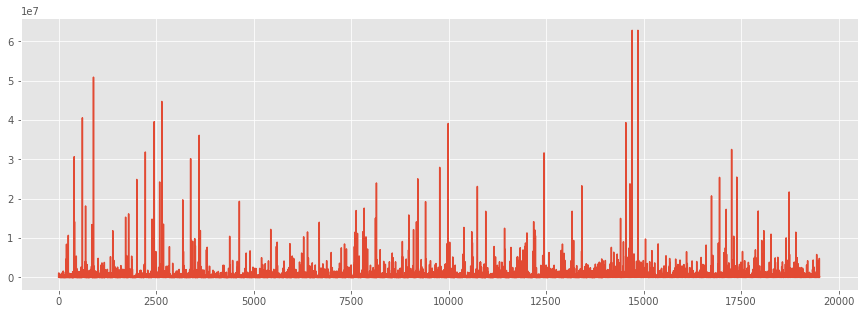

In [ ]:
MXVideos.views.plot(figsize=(15,5))

Se pueden agregar más atributos a la gráfica de la misma forma como se haría para una gráfica de `matplotlib`.

Text(0.5, 1.0, 'Número de vistas para cada video')

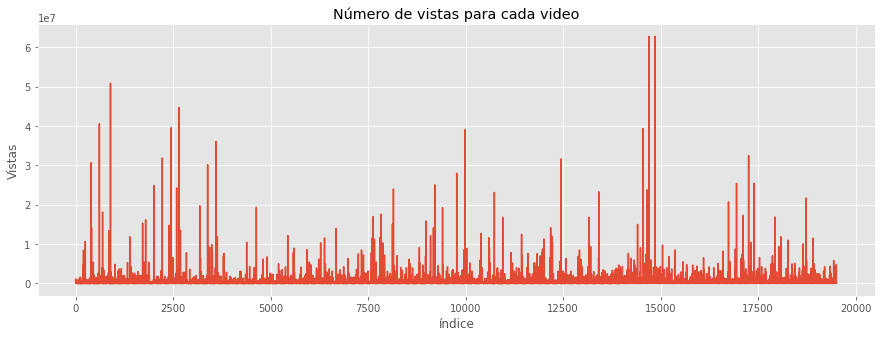

In [ ]:
MXVideos.views.plot(figsize=(15,5))
plt.xlabel('índice')
plt.ylabel('Vistas')
plt.title('Número de vistas para cada video')

Agrupando, podemos graficar el video con el máximo número de vistas en cada mes.

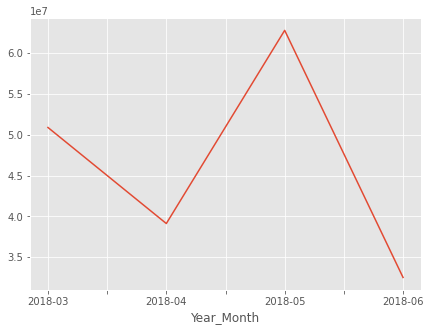

In [ ]:
MXVideos.groupby('Year_Month')['views'].max().plot(figsize=(7,5))

También podemos especificar qué columnas queremos graficar y el tipo de gráfica que queremos usar.

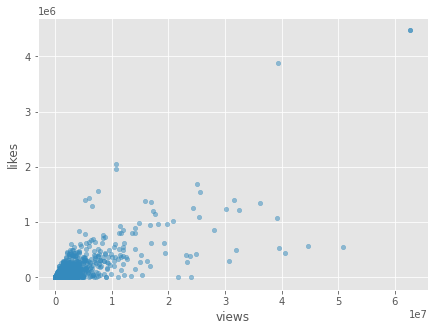

In [ ]:
MXVideos.plot.scatter(x="views", y="likes",
                      alpha=0.5,
                      figsize=(7,5))

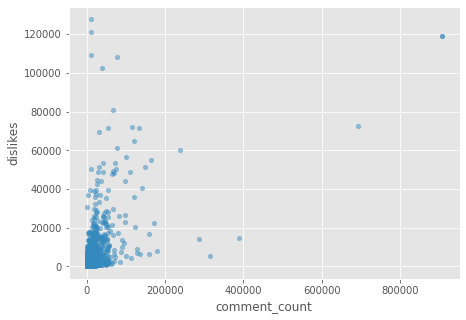

In [ ]:
MXVideos.plot.scatter(x="comment_count", y="dislikes",
                      alpha=0.5,
                      figsize=(7,5))

Y para histogramas:

In [ ]:
MXVideos['likes']

0         20901
1         36333
2        137101
3         17351
4         25572
          ...  
19507     65639
19508      3558
19509       538
19510        94
19511      5398
Name: likes, Length: 19512, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa125eed650>]],
      dtype=object)

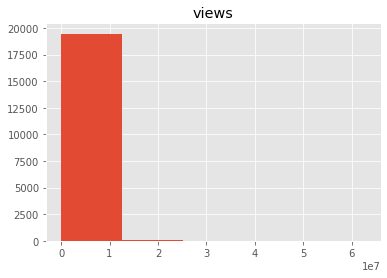

In [ ]:
MXVideos.hist(column='views', bins=5)

Si elegimos varias columnas, las gráficas se superponen.

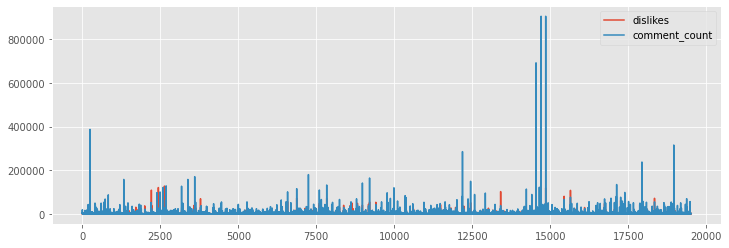

In [ ]:
MXVideos[['dislikes','comment_count']].plot(figsize=(12, 4));

Con la opción `subplots` podemos separar la gráfica de cada columna en figuras diferentes.

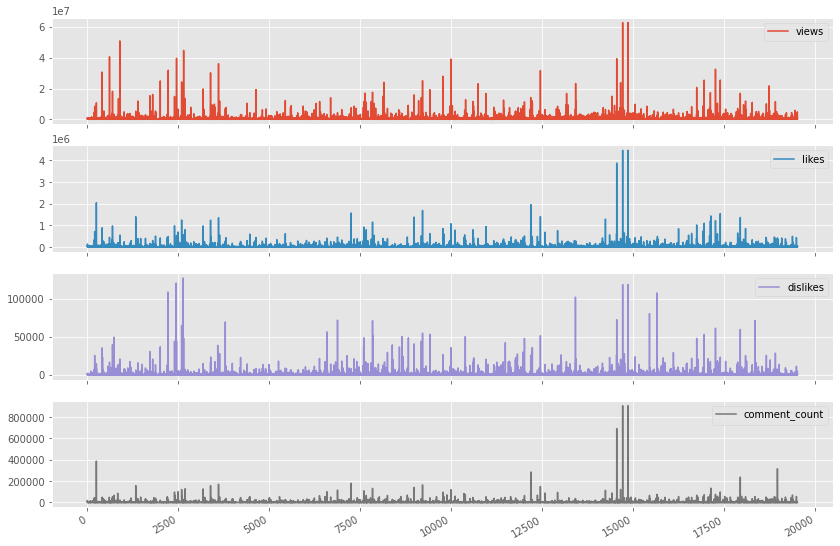

In [ ]:
columns = ['views','likes','dislikes','comment_count']

MXVideos[columns].plot(figsize=(14, 10),
                       subplots=True);

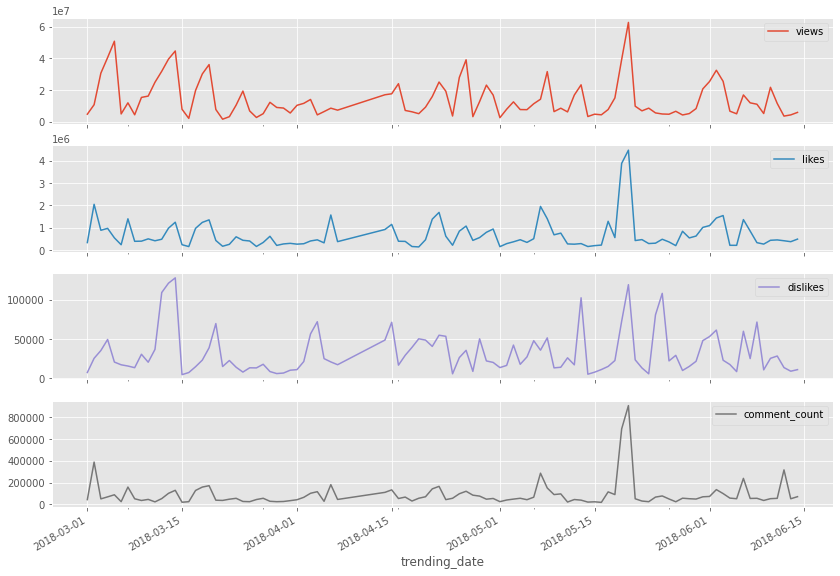

In [ ]:
columns = ['views','likes','dislikes','comment_count']
MXVideos.groupby('trending_date')[columns].max().plot(figsize=(14, 10),
                                                      subplots=True);

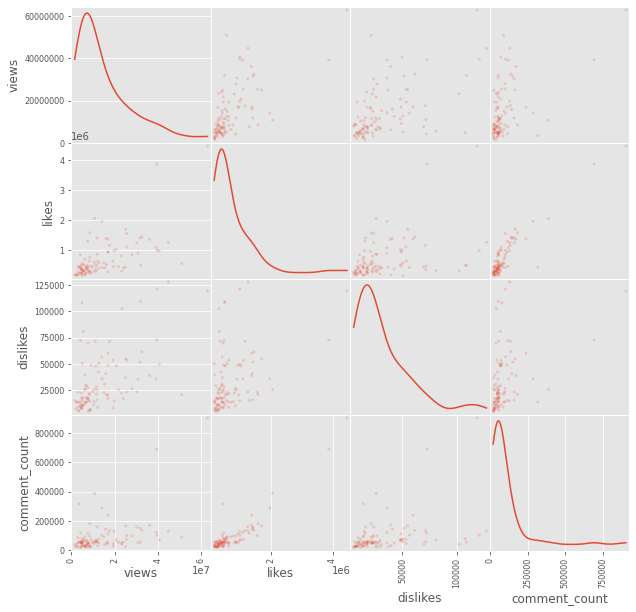

In [ ]:
from pandas.plotting import scatter_matrix

columns = ['views','likes','dislikes','comment_count']

scatter_matrix(MXVideos.groupby('trending_date')[columns].max(),
               alpha=0.2,
               figsize=(10, 10),
               diagonal="kde");

## Formato y estilo

Pandas tiene un gran número de herramientas que permiten cambiar la forma de visualización de los data frames. Como ejemplo, extraeremos el número máximo de vistas, likes, dislikes y comentarios en un mismo día en un nuevo data frame.

In [ ]:
columns = ['views','likes','dislikes','comment_count']

videos_info = MXVideos.groupby('trending_date')[columns].max()

Podemos reemplazar los NaN por algún mensaje, como *Missing*.

In [ ]:
MXVideos[['title', 'description']].tail()

,title,description
19507,Shawn Mendes x Portugal (FPF Official World Cu...,Portugal's Football Team Official SongLyrics: ...
19508,AMLO llegó con su esposa al Tercer Debate en M...,AMLO llegó con su esposa al Tercer Debate en M...
19509,Maire usa una blusa kawaiii ¿adorable o ridícula?,Maire usa una blusa kawaii de Alicia en el paí...
19510,La Jefa del Campeón - Capítulo 2 Parte 3/4,NaN
19511,¿POR QUÉ SHANKS ES TAN RESPETADO POR TODOS EN ...,Hoy os traigo el preguntas y respuestas 104 de...


In [ ]:
MXVideos[['title', 'description']].tail().style.format(None, na_rep='MISSING')

,title,description
19507,Shawn Mendes x Portugal (FPF Official World Cup Song),"Portugal's Football Team Official SongLyrics: Help meIt’s like the walls are caving inSometimes I feel like giving upBut I just can’tIt isn’t in my bloodLaying on the bathroom floorFeeling nothingOverwhelmed and insecureGive me somethingI can take to ease my mind, slowly..É um sonho que trago comigo Se acreditares sonho contigoKeep telling me that it gets betterDoes it ever?Help meIt’s like the walls are caving inSometimes I feel like giving upNo medicine is strong enoughSomeone help meI’m crawling in my skinSometimes I feel like giving upBut I just can’tIt isn’t in my bloodEu vou acreditar! Looking through my phone againFeeling anxiousAfraid to be alone againI hate thisTrying to find a way to chillCan’t breathe, noIs there somebody who can help meIt’s like the walls are caving in Sometimes I feel like giving upNo medicine is strong enoughSomeone help meI’m crawling in my skinSometimes I feel like giving upBut I just can’tIt isn’t in my bloodEu vou acreditar! Que vamos conseguir Que vamos conquistar Nós somos Portugal Uma só voz E um coração! Help meIt’s like the walls are caving inSometimes I feel like giving upBut I just can’tIt isn’t in my bloodEu vou acreditar! It isn’t in my bloodQue vamos conquistar Nós somos Portugal Uma só voz E um coração! It isn’t in my blood--WWW.CONQUISTAOSONHO.COMNo relvado, na tua vida, sonha em grande. #ConquistaOSonhoConhece toda a experiência em www.conquistaosonho.comOn the pitch, in your life, dream big. #ConquerYourDreamFind out more at www.conqueryourdream.net--Facebook: https://www.facebook.com/PORTUGAL/Instagram: https://www.instagram.com/portugal/Twitter: https://twitter.com/selecaoportugalT-shirts Collection: https://bit.ly/2JuGETdPortugal Official Kits: https://portugalstore.fpf.pt/pt--"
19508,AMLO llegó con su esposa al Tercer Debate en Mérida,AMLO llegó con su esposa al Tercer Debate en MéridaFacebook: https://www.facebook.com/NoticiaMx/ Twitter: https://twitter.com/saotikomxhttp://www.noticiamx.com/
19509,Maire usa una blusa kawaiii ¿adorable o ridícula?,"Maire usa una blusa kawaii de Alicia en el país de las maravillas, pregunta a sus bebés si se ve adorable o ridícula. Escenas del debate."
19510,La Jefa del Campeón - Capítulo 2 Parte 3/4,MISSING
19511,¿POR QUÉ SHANKS ES TAN RESPETADO POR TODOS EN ONE PIECE? | ¿ES RAYLEIGH TÍO DE LUFFY? | OP PYR 104,"Hoy os traigo el preguntas y respuestas 104 de One Piece, ¡disfrutadlo! ;)Lista de reproducción: https://www.youtube.com/playlist?list=PLjdBsZncdzYUxi1_vaNgP2iIEpHg1SzE0Twitter: https://twitter.com/GolDNakamaLa falta de respeto tanto a mí como a cualquier otro y el SPAM son razones de bloqueo en mi canal.Copyright Disclaimer Under Section 107 of the Copyright Act 1976, allowance is made for fair use for purposes such as criticism, comment, news reporting, teaching, scholarship, and research. Fair use is a use permitted by copyright statute that might otherwise be infringing. Non-profit, educational or personal use tips the balance in favor of fair use"


También podemos cambiar el formato de la información que se encuentra en una celda.

In [ ]:
videos_info.head()

,views,likes,dislikes,comment_count
trending_date,,,,
2018-03-01,4686547,339186,7622,42964
2018-03-02,10695328,2050610,25611,387403
2018-03-03,30686233,889686,35509,49788
2018-03-04,40567774,975306,49517,68192
2018-03-05,50896717,550478,20865,87376


In [ ]:
dic = {'views':'{:,}',
       'likes':'${:,.1f}',
       'dislikes':'{:,}',
       'comment_count':'{:,}'}

videos_info.head().style.format(dic)

,views,likes,dislikes,comment_count
trending_date,,,,
2018-03-01 00:00:00,"4,686,547","$339,186.0","7,622","42,964"
2018-03-02 00:00:00,"10,695,328","$2,050,610.0","25,611","387,403"
2018-03-03 00:00:00,"30,686,233","$889,686.0","35,509","49,788"
2018-03-04 00:00:00,"40,567,774","$975,306.0","49,517","68,192"
2018-03-05 00:00:00,"50,896,717","$550,478.0","20,865","87,376"


In [ ]:
videos_info.head().style.format(formatter={('likes'): lambda x: "$ {:,.1f}".format(x)})

,views,likes,dislikes,comment_count
trending_date,,,,
2018-03-01 00:00:00,4686547,"$ 339,186.0",7622,42964
2018-03-02 00:00:00,10695328,"$ 2,050,610.0",25611,387403
2018-03-03 00:00:00,30686233,"$ 889,686.0",35509,49788
2018-03-04 00:00:00,40567774,"$ 975,306.0",49517,68192
2018-03-05 00:00:00,50896717,"$ 550,478.0",20865,87376


Existen algunas funciones predeterminadas que resaltan ciertos tipos de información. Como ejemplo, mostramos `highlight_null`, que señala las celdas vacías.

In [ ]:
MXVideos[['title', 'description']].tail().style.highlight_null(null_color='tomato')

,title,description
19507,Shawn Mendes x Portugal (FPF Official World Cup Song),"Portugal's Football Team Official SongLyrics: Help meIt’s like the walls are caving inSometimes I feel like giving upBut I just can’tIt isn’t in my bloodLaying on the bathroom floorFeeling nothingOverwhelmed and insecureGive me somethingI can take to ease my mind, slowly..É um sonho que trago comigo Se acreditares sonho contigoKeep telling me that it gets betterDoes it ever?Help meIt’s like the walls are caving inSometimes I feel like giving upNo medicine is strong enoughSomeone help meI’m crawling in my skinSometimes I feel like giving upBut I just can’tIt isn’t in my bloodEu vou acreditar! Looking through my phone againFeeling anxiousAfraid to be alone againI hate thisTrying to find a way to chillCan’t breathe, noIs there somebody who can help meIt’s like the walls are caving in Sometimes I feel like giving upNo medicine is strong enoughSomeone help meI’m crawling in my skinSometimes I feel like giving upBut I just can’tIt isn’t in my bloodEu vou acreditar! Que vamos conseguir Que vamos conquistar Nós somos Portugal Uma só voz E um coração! Help meIt’s like the walls are caving inSometimes I feel like giving upBut I just can’tIt isn’t in my bloodEu vou acreditar! It isn’t in my bloodQue vamos conquistar Nós somos Portugal Uma só voz E um coração! It isn’t in my blood--WWW.CONQUISTAOSONHO.COMNo relvado, na tua vida, sonha em grande. #ConquistaOSonhoConhece toda a experiência em www.conquistaosonho.comOn the pitch, in your life, dream big. #ConquerYourDreamFind out more at www.conqueryourdream.net--Facebook: https://www.facebook.com/PORTUGAL/Instagram: https://www.instagram.com/portugal/Twitter: https://twitter.com/selecaoportugalT-shirts Collection: https://bit.ly/2JuGETdPortugal Official Kits: https://portugalstore.fpf.pt/pt--"
19508,AMLO llegó con su esposa al Tercer Debate en Mérida,AMLO llegó con su esposa al Tercer Debate en MéridaFacebook: https://www.facebook.com/NoticiaMx/ Twitter: https://twitter.com/saotikomxhttp://www.noticiamx.com/
19509,Maire usa una blusa kawaiii ¿adorable o ridícula?,"Maire usa una blusa kawaii de Alicia en el país de las maravillas, pregunta a sus bebés si se ve adorable o ridícula. Escenas del debate."
19510,La Jefa del Campeón - Capítulo 2 Parte 3/4,nan
19511,¿POR QUÉ SHANKS ES TAN RESPETADO POR TODOS EN ONE PIECE? | ¿ES RAYLEIGH TÍO DE LUFFY? | OP PYR 104,"Hoy os traigo el preguntas y respuestas 104 de One Piece, ¡disfrutadlo! ;)Lista de reproducción: https://www.youtube.com/playlist?list=PLjdBsZncdzYUxi1_vaNgP2iIEpHg1SzE0Twitter: https://twitter.com/GolDNakamaLa falta de respeto tanto a mí como a cualquier otro y el SPAM son razones de bloqueo en mi canal.Copyright Disclaimer Under Section 107 of the Copyright Act 1976, allowance is made for fair use for purposes such as criticism, comment, news reporting, teaching, scholarship, and research. Fair use is a use permitted by copyright statute that might otherwise be infringing. Non-profit, educational or personal use tips the balance in favor of fair use"


Y `highlight_max`, que señala el máximo.

In [ ]:
videos_info.sort_values(by='views', ascending=False).head().style.highlight_max()

,views,likes,dislikes,comment_count
trending_date,,,,
2018-05-20 00:00:00,62796390,4470923,119053,905925
2018-03-05 00:00:00,50896717,550478,20865,87376
2018-03-14 00:00:00,44726356,1249421,127684,128441
2018-03-04 00:00:00,40567774,975306,49517,68192
2018-03-13 00:00:00,39575633,983732,120964,100543


Podemos resaltar valores importantes, como los que superen un valor determinado. En el siguiente ejemplo, resaltamos los valores que sean mayores a 1.000.000 (10^6).

In [ ]:
def highlight(v, props=''):
    return props if v >1e6 else None

videos_info.head().style.applymap(highlight, props='color:green;')

,views,likes,dislikes,comment_count
trending_date,,,,
2018-03-01 00:00:00,4686547,339186,7622,42964
2018-03-02 00:00:00,10695328,2050610,25611,387403
2018-03-03 00:00:00,30686233,889686,35509,49788
2018-03-04 00:00:00,40567774,975306,49517,68192
2018-03-05 00:00:00,50896717,550478,20865,87376


O también podemos resaltar la celda

In [ ]:
videos_info.head().style.applymap(highlight, props='background-color:coral')

,views,likes,dislikes,comment_count
trending_date,,,,
2018-03-01 00:00:00,4686547,339186,7622,42964
2018-03-02 00:00:00,10695328,2050610,25611,387403
2018-03-03 00:00:00,30686233,889686,35509,49788
2018-03-04 00:00:00,40567774,975306,49517,68192
2018-03-05 00:00:00,50896717,550478,20865,87376


Usando `bar` podemos visualizar los valores más grandes y qué tan similares son respecto a los demás.

In [ ]:
videos_info.head().style.bar()

,views,likes,dislikes,comment_count
trending_date,,,,
2018-03-01 00:00:00,4686547,339186,7622,42964
2018-03-02 00:00:00,10695328,2050610,25611,387403
2018-03-03 00:00:00,30686233,889686,35509,49788
2018-03-04 00:00:00,40567774,975306,49517,68192
2018-03-05 00:00:00,50896717,550478,20865,87376


In [ ]:
videos_info.sort_values(by='views', ascending=False).head().style.bar()

,views,likes,dislikes,comment_count
trending_date,,,,
2018-05-20 00:00:00,62796390,4470923,119053,905925
2018-03-05 00:00:00,50896717,550478,20865,87376
2018-03-14 00:00:00,44726356,1249421,127684,128441
2018-03-04 00:00:00,40567774,975306,49517,68192
2018-03-13 00:00:00,39575633,983732,120964,100543


## Manipulación de strings

Utilizar el método `str` permite tener acceso a propiedades de las cadenas de caracteres (*strings*) en una columna. Esto nos permite manipular el texto y encontrar información de manera mucho más fácil. Como ejemplo, tomamos la columna `title`, que contiene los títulos de los videos.

In [ ]:
MXVideos.title.head()

0                                           Zoé - Azul
1    Datos reales de cuánto dinero se gana en Youtu...
2                            EL CHALLENGE MAS IDIOTA !
3    😡 URGENTE ! ALEX BACKMAN: 🚫 ¡NO SOY YO! EN WHA...
4                Bullying Infantil *Experimento Social
Name: title, dtype: object

In [ ]:
MXVideos.title.str[0]

0        Z
1        D
2        E
3        😡
4        B
        ..
19507    S
19508    A
19509    M
19510    L
19511    ¿
Name: title, Length: 19512, dtype: object

Podemos ver el tamaño de la cadena de caracteres con `len`.

In [ ]:
MXVideos.title.str.len().head()

0    10
1    61
2    25
3    76
4    37
Name: title, dtype: int64

Para verificar si las entradas están en mayúscula.

In [ ]:
MXVideos.title.str.isupper().head()

0    False
1    False
2     True
3     True
4    False
Name: title, dtype: bool

O verificar si son numéricas.

In [ ]:
MXVideos.title.str.isnumeric().head()

0    False
1    False
2    False
3    False
4    False
Name: title, dtype: bool

Podemos volver todas las entradas minúsculas con `lower`.

In [ ]:
MXVideos.title.str.lower().head()

0                                           zoé - azul
1    datos reales de cuánto dinero se gana en youtu...
2                            el challenge mas idiota !
3    😡 urgente ! alex backman: 🚫 ¡no soy yo! en wha...
4                bullying infantil *experimento social
Name: title, dtype: object

Para mayúsculas, usamos `upper`.

In [ ]:
MXVideos.title.str.upper().head()

0                                           ZOÉ - AZUL
1    DATOS REALES DE CUÁNTO DINERO SE GANA EN YOUTU...
2                            EL CHALLENGE MAS IDIOTA !
3    😡 URGENTE ! ALEX BACKMAN: 🚫 ¡NO SOY YO! EN WHA...
4                BULLYING INFANTIL *EXPERIMENTO SOCIAL
Name: title, dtype: object

Podemos reemplazar texto por otro con `replace`. Por ejemplo, podemos reemplazar los espacios por guión bajo.

In [ ]:
MXVideos.title.str.replace(' ', '_')

0                                               Zoé_-_Azul
1        Datos_reales_de_cuánto_dinero_se_gana_en_Youtu...
2                                EL_CHALLENGE_MAS_IDIOTA_!
3        😡_URGENTE_!_ALEX_BACKMAN:_🚫_¡NO_SOY_YO!_EN_WHA...
4                    Bullying_Infantil_*Experimento_Social
                               ...                        
19507    Shawn_Mendes_x_Portugal_(FPF_Official_World_Cu...
19508    AMLO_llegó_con_su_esposa_al_Tercer_Debate_en_M...
19509    Maire_usa_una_blusa_kawaiii_¿adorable_o_ridícula?
19510           La_Jefa_del_Campeón_-_Capítulo_2_Parte_3/4
19511    ¿POR_QUÉ_SHANKS_ES_TAN_RESPETADO_POR_TODOS_EN_...
Name: title, Length: 19512, dtype: object

Podemos separar las cadenas de caracteres dado un símbolo. A continuación utilizamos espacio.

In [ ]:
palabras = MXVideos.title.str.split(' ')

In [ ]:
palabras.head()

0                                       [Zoé, -, Azul]
1    [Datos, reales, de, cuánto, dinero, se, gana, ...
2                      [EL, CHALLENGE, MAS, IDIOTA, !]
3    [😡, URGENTE, !, ALEX, BACKMAN:, 🚫, ¡NO, SOY, Y...
4           [Bullying, Infantil, *Experimento, Social]
Name: title, dtype: object

Podemos acceder a cada una de las palabras tratando cada fila como una lista o con la función `get`.

In [ ]:
palabras[1]

['Datos',
 'reales',
 'de',
 'cuánto',
 'dinero',
 'se',
 'gana',
 'en',
 'Youtube',
 '#Anecdotario']

In [ ]:
palabras[1][2]

'de'

In [ ]:
palabras.get(1)

['Datos',
 'reales',
 'de',
 'cuánto',
 'dinero',
 'se',
 'gana',
 'en',
 'Youtube',
 '#Anecdotario']

### Expresiones regulares

Las expresiones regulares son muy comunes y útiles en manipulación de texto y búsqueda de información. Podemos pensar en ellas como plantillas o patrones que contienen ciertas condiciones que una cadena de caracteres debe tener. De esta manera, podemos encontrar o filtrar cadenas de caracteres que comiencen con mayúscula, que tengan cierto número de letras, que contengan cierta cantidad de números, entre otros.

Python cuenta con una librería para expresiones regulares llamada `re` ([documentación](https://docs.python.org/3/library/re.html)). Aquí listaremos únicamente algunas expresiones necesarias para los ejemplos:

* `[A-Z]`: coincide con una letra mayúscula entre la A y la Z.
* `[a-b]`: coincide con una letra minúscula entre la a y la z.
* `[0-9]`: coincide con números del 0 al 9.
* `+`: coincide con una o más repeticiones del caracter inmediatamente anterior.

**Ejemplos:**

En una lista tenemos las cadenas de caracteres `Hola`, `casa`, `597`, `nombre3`.

* La plantilla `[a-z]+` coincide únicamente con la palabra `casa`, pues consiste en la repetición una o más veces de letras entre la a y la z en minúscula.

* La plantilla `[0-9]+` coincide únicamente con `597`, pues consiste únicamente de la repetición de números.

* La plantilla `[a-z]+[0-9]` coincide únicamente con `nombre3`, pues consiste de repeticiones de letras entre la a y la z en minúscula y termina en un único número.

Las letras con acento deben incluirse por aparte.

La función `match` nos permite saber si una expresión está contenida en la cadena de caracteres, comparando desde el inicio de la cadena.

In [ ]:
MXVideos.title.head(7)

0                                           Zoé - Azul
1    Datos reales de cuánto dinero se gana en Youtu...
2                            EL CHALLENGE MAS IDIOTA !
3    😡 URGENTE ! ALEX BACKMAN: 🚫 ¡NO SOY YO! EN WHA...
4                Bullying Infantil *Experimento Social
5        50 cosas sobre el Jefote I Papá de Fedelobo I
6    Chivas vs Cibao 5-0 Resumen Goles Concahampion...
Name: title, dtype: object

In [ ]:
expresion = 'D' # Cualquier cadena que empiece con D

MXVideos.title.str.match(expresion).head(7)

0    False
1     True
2    False
3    False
4    False
5    False
6    False
Name: title, dtype: bool

In [ ]:
expresion = r'[A-Z][a-z]+' # Cadena que comienza con mayúscula y todas las demás letras son en múscula (sin acentos)

MXVideos.title.str.match(expresion).head(7)

0     True
1     True
2    False
3    False
4     True
5    False
6     True
Name: title, dtype: bool

Con `contains` podemos buscar si hay un patrón en cualquier parte de la cadena.

In [ ]:
MXVideos.title.str.contains('de').head(7)

0    False
1     True
2    False
3    False
4    False
5     True
6    False
Name: title, dtype: bool

In [ ]:
expresion = r'[A-Z][a-z]+' # Alguna palabra que comience con mayúscula y tenga todas las demás letras en minúscula

MXVideos.title.str.contains(expresion).head(7)

0     True
1     True
2    False
3    False
4     True
5     True
6     True
Name: title, dtype: bool

O si contiene números.

In [ ]:
MXVideos.title.str.contains('[0-9]+').head(7)

0    False
1    False
2    False
3     True
4    False
5     True
6     True
Name: title, dtype: bool

También es posible usar `replace` con expresiones regulares.

In [ ]:
MXVideos.title.str.replace(r'[A-Z]', '*', regex=True) # Reemplaza todas las mayúsculas (sin acento) con asteriscos

0                                               *oé - *zul
1        *atos reales de cuánto dinero se gana en *outu...
2                                ** ********* *** ****** !
3        😡 ******* ! **** *******: 🚫 ¡** *** **! ** ***...
4                    *ullying *nfantil **xperimento *ocial
                               ...                        
19507    *hawn *endes x *ortugal (*** *fficial *orld *u...
19508    **** llegó con su esposa al *ercer *ebate en *...
19509    *aire usa una blusa kawaiii ¿adorable o ridícula?
19510           *a *efa del *ampeón - *apítulo 2 *arte 3/4
19511    ¿*** **É ****** ** *** ********* *** ***** ** ...
Name: title, Length: 19512, dtype: object